In this section, I conducted experiments to determine which model performs best with the dataset. I used PyCaret, an open-source, low-code machine learning library that simplifies the machine learning workflow. **PyCaret** was used to train multiple models and evaluate their performance using the F1-Score as the primary metric, given the imbalanced nature of the label. Let’s get started!

In [29]:
# Import necessary libraries
import pycaret  # PyCaret library for simplified machine learning
import pycaret.classification  # Specific module for classification tasks
from pycaret.classification import *  # Import all classification functionalities from PyCaret
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Visualization of data
import seaborn as sns  # Advanced visualization for statistical graphics
import warnings  # Library for managing warnings
warnings.filterwarnings('ignore')  # Suppress all warnings to keep the output clean
pycaret.__version__  # Prints the version of PyCaret being used


'3.3.2'

In [30]:
df_orig = pd.read_csv('loan_analyzed.csv') # Load data from CSV file
# Select features related to loan approval status and other relevant metrics
selected_features = [
    'employment_status', 'credit_score', 
    'diff_income_to_expenses', 'debt_to_income_ratio', 'loan_approval_status'
]
df = df_orig[selected_features]

In [31]:
# Display the structure and data types of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49719 entries, 0 to 49718
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employment_status        49719 non-null  object 
 1   credit_score             49719 non-null  int64  
 2   diff_income_to_expenses  49719 non-null  float64
 3   debt_to_income_ratio     49719 non-null  float64
 4   loan_approval_status     49719 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ MB


In [32]:
# Create a copy of the DataFrame for processing and display the first 5 rows
data = df.copy()
data.head()

,employment_status,credit_score,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status
0,Employed,743,9125.416667,0.141686,1
1,Employed,468,-2277.500000,0.865750,0
2,Self-Employed,389,-1135.083333,0.497969,0
3,Self-Employed,778,8755.750000,0.207525,1
4,Employed,752,5164.750000,0.107397,1


## PyCaret Setup
I used the **setup()** function, the core of PyCaret, to prepare the data for modeling. This function handles data preprocessing and experiment setup, such as splitting the data into train/test sets, normalizing the data, and setting the random seed for reproducibility. Once the function completes, it displays a summary of all the preprocessing steps performed.

In [33]:
# Set up the PyCaret environment for classification
s = setup(data, target='loan_approval_status', session_id=123,
          normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,loan_approval_status
2,Target type,Binary
3,Original data shape,"(49719, 5)"
4,Transformed data shape,"(49719, 7)"
5,Transformed train set shape,"(34803, 7)"
6,Transformed test set shape,"(14916, 7)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


I also used the **get_config()** function to check the configurations applied during the setup. For example, calling `get_config('parameter_name') provides details about the specified parameter.

In [34]:
# Display PyCaret's internal configurations
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [35]:
# Get transformed training data from the PyCaret session
get_config('X_train_transformed')

,employment_status_Employed,employment_status_Unemployed,employment_status_Self-Employed,credit_score,diff_income_to_expenses,debt_to_income_ratio
44682,1.0,0.0,0.0,0.420765,0.244829,0.311153
23222,0.0,1.0,0.0,0.819672,0.706971,0.136952
37490,1.0,0.0,0.0,0.830601,0.538252,0.182762
25995,0.0,0.0,1.0,0.845173,0.376471,0.040190
28828,1.0,0.0,0.0,0.489982,0.424244,0.198590
...,...,...,...,...,...,...
2426,0.0,1.0,0.0,0.772313,0.609722,0.199981
7362,1.0,0.0,0.0,0.861566,0.561615,0.084933
43406,1.0,0.0,0.0,0.896175,0.425044,0.251092
31374,0.0,0.0,1.0,0.244080,0.360282,0.129373


In [36]:
# Get the target variable from the PyCaret session
get_config('y')

44682    0
23222    0
37490    1
25995    1
28828    1
        ..
13495    0
44549    0
32647    1
2349     1
45467    1
Name: loan_approval_status, Length: 49719, dtype: int8

## Model Training and Comparison
This step involved training multiple models on the dataset and comparing their performance to identify the best model for prediction and deployment.

In [37]:
# Compare multiple classification models and select the best one based on default metrics
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8500,0.8162,0.9323,0.8496,0.8890,0.6591,0.6660,0.1090
gbc,Gradient Boosting Classifier,0.8499,0.8168,0.9322,0.8496,0.8889,0.6589,0.6657,0.4640
ada,Ada Boost Classifier,0.8498,0.8176,0.9322,0.8495,0.8889,0.6588,0.6656,0.1560
catboost,CatBoost Classifier,0.8497,0.8160,0.9321,0.8494,0.8888,0.6584,0.6653,4.0520
lr,Logistic Regression,0.8495,0.8146,0.9323,0.8491,0.8887,0.6580,0.6649,1.0240
lda,Linear Discriminant Analysis,0.8494,0.8145,0.9325,0.8488,0.8887,0.6576,0.6647,0.0230
svm,SVM - Linear Kernel,0.8492,0.8145,0.9326,0.8484,0.8885,0.6569,0.6641,0.0280
ridge,Ridge Classifier,0.8492,0.8145,0.9325,0.8485,0.8885,0.6570,0.6641,0.0220
rf,Random Forest Classifier,0.8442,0.8177,0.9243,0.8478,0.8844,0.6471,0.6529,0.6930
nb,Naive Bayes,0.8404,0.8169,0.9189,0.8466,0.8812,0.6390,0.6441,0.0230


The results revealed that the **Light Gradient Boosting Machine (LightGBM)** performed best, achieving an impressive F1-Score of **0.889**. The next step was to fine-tune the model's hyperparameters to enhance its efficiency further.

In [54]:
# List all models available in PyCaret
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [39]:
# Display the best-selected model
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [40]:
# Create a LightGBM classification model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8532,0.8103,0.9425,0.8470,0.8922,0.6643,0.6737
1,0.8463,0.8095,0.9322,0.8452,0.8866,0.6500,0.6576
2,0.8495,0.8179,0.9296,0.8507,0.8884,0.6586,0.6647
3,0.8491,0.8181,0.9287,0.8509,0.8881,0.6581,0.6640
4,0.8609,0.8346,0.9380,0.8591,0.8968,0.6847,0.6909
5,0.8454,0.8054,0.9282,0.8467,0.8856,0.6489,0.6554
6,0.8491,0.8175,0.9313,0.8492,0.8884,0.6573,0.6640
7,0.8425,0.8077,0.9247,0.8455,0.8833,0.6427,0.6488
8,0.8578,0.8284,0.9305,0.8603,0.8940,0.6789,0.6838


## Hyperparameter Tuning

In [41]:
# Define a hyperparameter tuning grid for LightGBM
lightgbm_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 4, 6, 8, 10, 12, 20],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [20, 30],
    'colsample_bytree': [0.8, 1.0]
}

# Tune the LightGBM model using the custom hyperparameter grid
# Optimize the model based on the F1 score and return the tuner object
tuned_lightgbm, tuner = tune_model(lightgbm, custom_grid=lightgbm_grid, optimize='F1', return_tuner=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8532,0.8149,0.9425,0.8470,0.8922,0.6643,0.6737
1,0.8463,0.8112,0.9322,0.8452,0.8866,0.6500,0.6576
2,0.8495,0.8160,0.9296,0.8507,0.8884,0.6586,0.6647
3,0.8491,0.8240,0.9287,0.8509,0.8881,0.6581,0.6640
4,0.8609,0.8351,0.9380,0.8591,0.8968,0.6847,0.6909
5,0.8454,0.8027,0.9282,0.8467,0.8856,0.6489,0.6554
6,0.8491,0.8197,0.9313,0.8492,0.8884,0.6573,0.6640
7,0.8425,0.8076,0.9247,0.8455,0.8833,0.6427,0.6488
8,0.8578,0.8276,0.9305,0.8603,0.8940,0.6789,0.6838


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
# Display the tuned LightGBM model
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

After performing hyperparameter tuning, I found that the model achieved its best performance with the default parameters. While this is convenient, it raised concerns about certain parameters, such as max_depth, which could lead to CPU resource issues if not monitored properly.

## Final Machine Learning Pipeline

In [43]:
# Display the tuning results
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['credit_score',
                                                                          'diff_income_to_expenses',
                                                                          'debt_to_income_ratio'],
                                                                 transformer=SimpleImputer(add_indicator=False,
                                                                                           copy=True,
                                                                                           fill_value=No...
                                                                            0.1],
                                        'actual_estimator__max_depth': [2, 4, 6,
                                                                        8, 10,
                                                                        12,
                                                                        20],
                                        'actual_estimator__min_child_samples': [20,
                                                                                30],
                                        'actual_estimator__n_estimators': [100,
                                                                           150,
                                                                           200],
                                        'actual_estimator__num_leaves': [20, 31,
                                                                         40]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted),
                   verbose=1)

The most efficient pipeline identified during this experiment involves the following steps:

    * One-Hot Encoding
    * Min-Max Scaling
    * Feeding the preprocessed data into the LightGBM Classifier

This pipeline ensures an optimal balance between simplicity and performance, making it suitable for deployment

## Model Performance Evaluation

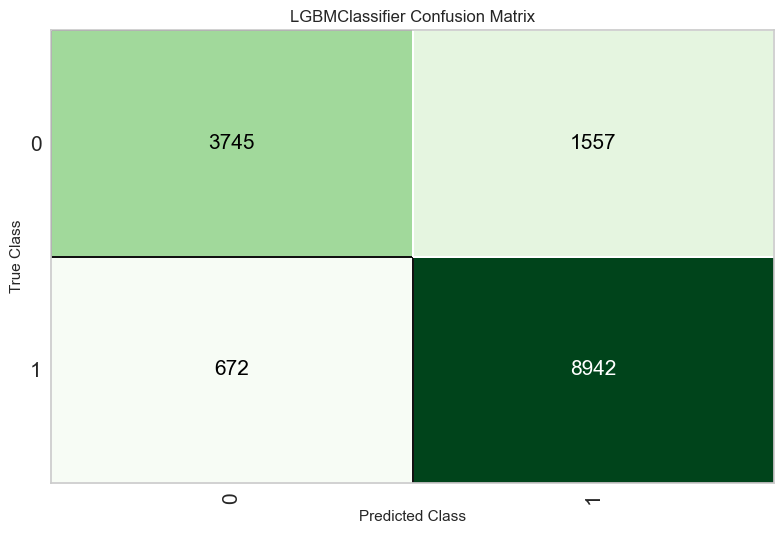

In [44]:
# Plot a confusion matrix for the best model
plot_model(best, plot='confusion_matrix')

The confusion matrix clearly showed the prediction results. The final F1-Score was **0.889**,indicating strong model performance.

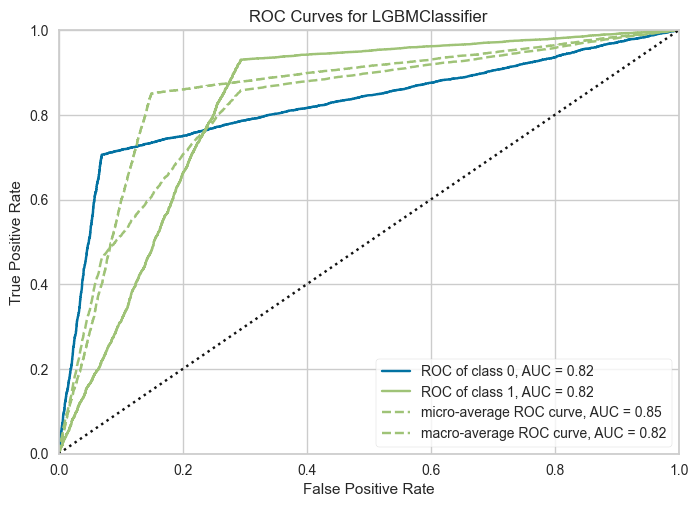

In [45]:
# Plot the AUC curve for the best model
plot_model(best, plot='auc')

 Additionally, the LightGBM Classifier achieved an AUC (Area Under the Curve) between 0.82 and 0.85, demonstrating its ability to differentiate between the classes effectively.

## Feature Importance

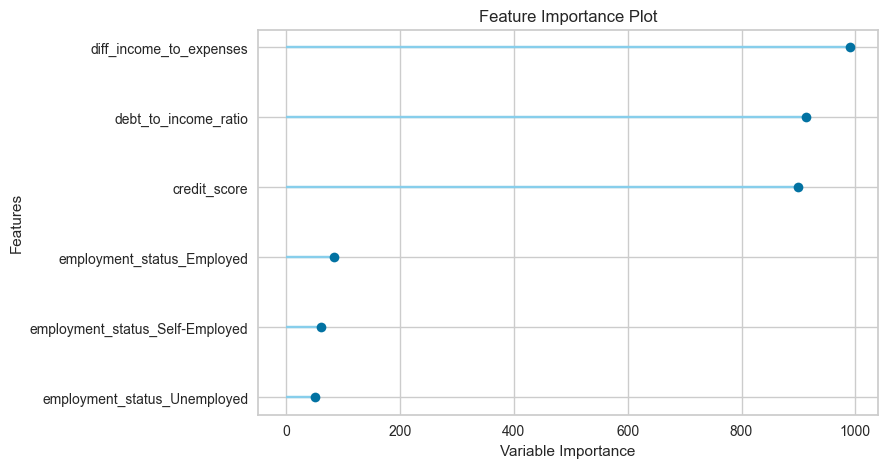

In [46]:
# Plot feature importance for the best model
plot_model(best, plot='feature')

The feature importance plot showed the most impactful features for the model. The top three contributing features were:

1. diff_income_to_expenses
2. debt_to_income_ratio
3. credit_score 

In [47]:
# Make predictions on the holdout dataset using the best model
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8506,0.8216,0.9301,0.8517,0.8892,0.6612,0.6673


In [48]:
# Display the first 5 rows of predictions on the holdout set
holdout_pred.head()

,employment_status,credit_score,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status,prediction_label,prediction_score
15196,Self-Employed,741,1942.916626,0.366232,1,1,0.8368
1420,Self-Employed,744,1972.666626,0.006130,1,1,0.7964
7581,Self-Employed,762,5723.833496,0.227243,0,1,0.8568
12645,Employed,798,3114.666748,0.058870,1,1,0.8843
40446,Employed,842,6763.916504,0.068308,1,1,0.8441


In [49]:
# Create a copy of the original dataset for new predictions
new_data = df_orig.copy()
new_data.head()

,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,annual_income,...,bank_account_history,transaction_frequency,default_risk,loan_approval_status,age_group,trans_freq_level,diff_income_to_expenses,debt_to_income_ratio,loan_to_value_ratio,credit_utilize
0,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,139901,...,8,20,0.81,1,Middle Adult,Medium,9125.416667,0.141686,0.175374,1.811552
1,Male,36,Married,2,High School,Employed,Business,Own,Suburban,21162,...,9,9,0.17,0,Middle Adult,Low,-2277.500000,0.865750,0.391645,0.375962
2,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,27815,...,7,27,0.25,0,Middle Age,High,-1135.083333,0.497969,0.370591,2.000144
3,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,137853,...,9,16,0.27,1,Middle Adult,Low,8755.750000,0.207525,0.246183,0.680883
4,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,81753,...,1,17,0.32,1,Middle Adult,Low,5164.750000,0.107397,0.285739,0.276562


In [50]:
# Generate predictions for the new dataset using the best model
predictions = predict_model(best, data=new_data)

# Display the first 5 rows of the predictions
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8502,0.8800,0.9316,0.8503,0.8891,0.6598,0.6664


,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,annual_income,...,default_risk,age_group,trans_freq_level,diff_income_to_expenses,debt_to_income_ratio,loan_to_value_ratio,credit_utilize,loan_approval_status,prediction_label,prediction_score
0,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,139901,...,0.81,Middle Adult,Medium,9125.416992,0.141686,0.175374,1.811552,1,1,0.8723
1,Male,36,Married,2,High School,Employed,Business,Own,Suburban,21162,...,0.17,Middle Adult,Low,-2277.500000,0.865750,0.391645,0.375962,0,0,0.7601
2,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,27815,...,0.25,Middle Age,High,-1135.083374,0.497969,0.370591,2.000144,0,0,0.8557
3,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,137853,...,0.27,Middle Adult,Low,8755.750000,0.207525,0.246183,0.680883,1,1,0.8579
4,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,81753,...,0.32,Middle Adult,Low,5164.750000,0.107397,0.285739,0.276562,1,1,0.8589


In [51]:
# Display the structure and data types of the predictions DataFrame
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49719 entries, 0 to 49718
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gender                      49719 non-null  category
 1   age                         49719 non-null  int8    
 2   marital_status              49719 non-null  category
 3   dependents                  49719 non-null  int8    
 4   education                   49719 non-null  category
 5   employment_status           49719 non-null  category
 6   occupation_type             49719 non-null  category
 7   residential_status          49719 non-null  category
 8   city/town                   49719 non-null  category
 9   annual_income               49719 non-null  int32   
 10  monthly_expenses            49719 non-null  int32   
 11  credit_score                49719 non-null  int32   
 12  existing_loans              49719 non-null  int8    
 13  total_existing_l

In [52]:
# Save the predictions to a CSV file
predictions.to_csv('predictions_label_dataset.csv', index=False)